In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
# # код для парсинга Lenta.ru:

# from bs4 import BeautifulSoup
# import requests
# requests_session = requests.Session()

# dates = []
# topics = []
# titles = []
# for day in range(1,50):
#   num_pages = 1
#   while True: #получить все новости за дату разом нельзя, как и узнать количество страниц, поэтому пришлось прибегнуть к while:
#     date = ((datetime.datetime.today() - datetime.timedelta(days=day)).strftime('%Y/%m/%d'))
#     link = requests_session.get('https://lenta.ru/{}/page/{}/'.format(date, num_pages))
#     soup = BeautifulSoup(link.text, 'lxml')
#     news_list = soup.find_all('a', {"class": "card-full-news _archive"}, href=True)
#     if len(news_list) == 0: #если на странице нет новостей, переходим к следующей дате
#       break

#     for news in news_list: #собираем данные по каждой новости
#       dates.append(date)
#       title = news.find_all('h3', {"class": "card-full-news__title"})
#       titles.append((title[0].get_text() if len(title) > 0 else 'None'))
#       topic = news.find_all('span', {"class": "card-full-news__info-item card-full-news__rubric"})
#       topics.append((topic[0].get_text() if len(topic) > 0 else 'None'))
#     num_pages+=1

# df = pd.DataFrame({'dates': dates, 'topics': topics, 'titles': titles })

# df.to_csv('lenta.csv', index=False)

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/ankislyakov/data/main/lenta.csv')

In [3]:
df

,dates,topics,titles
0,2024/05/06,Из жизни,93-летний миллиардер Руперт Мердок женится в п...
1,2024/05/06,Мир,В Берлине рассказали о непрекращающемся пожаре...
2,2024/05/06,Забота о себе,Проблемы с эрекцией и большая грудь. С какими ...
3,2024/05/06,Россия,В России началась трехдневная рабочая неделя
4,2024/05/06,Силовые структуры,МВД России объявило в розыск бывшего главу МИД...
...,...,...,...
24903,2024/03/19,Россия,Путин назвал экономику главной в программе раз...
24904,2024/03/19,Россия,Путин призвал оставить попытки запугать россиян
24905,2024/03/19,Мир,Трамп заявил о возможности вести переговоры по...
24906,2024/03/19,Россия,В Белгороде сбили 11 воздушных целей ВСУ на по...


In [6]:
category_list = df.topics.unique().tolist()
category_list

['Из жизни',
 'Мир',
 'Забота о себе',
 'Россия',
 'Силовые структуры',
 'Наука и техника',
 'Спорт',
 'Бывший СССР',
 'Ценности',
 'Экономика',
 'Интернет и СМИ',
 'Культура',
 'Путешествия',
 '69-я параллель',
 'Моя страна',
 'Среда обитания',
 nan,
 'Бизнес']

In [7]:
df['dates'] = pd.to_datetime(df['dates'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24908 entries, 0 to 24907
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   24908 non-null  datetime64[ns]
 1   topics  24903 non-null  object        
 2   titles  24908 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 583.9+ KB


In [12]:
df_time_series = pd.pivot_table(df,
                                index='topics',
                                columns='dates',
                                aggfunc='count',
                                fill_value=0)
df_time_series

titles                                              \
dates             2024-03-19 2024-03-20 2024-03-21 2024-03-22 2024-03-23   
topics                                                                     
69-я параллель             2          1          2          3          0   
Бизнес                     0          0          0          0          0   
Бывший СССР               74         69         92         95         19   
Забота о себе             17         17         17         16          0   
Из жизни                  21         19         19         19          3   
Интернет и СМИ            26         18         22         24          9   
Культура                  26         31         20         30          8   
Мир                      115        123        100        129         40   
Моя страна                 7          8          6          7          1   
Наука и техника           29         39         46         33          2   
Путешествия               34         20         21         22          3   
Россия                   105         93         81        151        192   
Силовые структуры         59         55         64        106         65   
Спорт                     28         21         26         22         22   
Среда обитания            23         23         24         29          0   
Ценности                  28         31         28         26          0   
Экономика                 61         57         58         58          5   

                                                                          ...  \
dates             2024-03-24 2024-03-25 2024-03-26 2024-03-27 2024-03-28  ...   
topics                                                                    ...   
69-я параллель             0          1          4          2          0  ...   
Бизнес                     0          0          0          0          0  ...   
Бывший СССР               33         61         84         64         85  ...   
Забота о себе              0         13         16         18         19  ...   
Из жизни                   0         14         19         20         22  ...   
Интернет и СМИ             5         17         22         24         29  ...   
Культура                   7         26         26         30         30  ...   
Мир                       48         92         93        101         95  ...   
Моя страна                 1          7          7         10          7  ...   
Наука и техника            7         31         31         35         32  ...   
Путешествия                5         21         26         25         19  ...   
Россия                   114        119         94        101         94  ...   
Силовые структуры         16         77         80         70         73  ...   
Спорт                     16         19         21         22         23  ...   
Среда обитания             1         27         33         34         33  ...   
Ценности                   0         24         29         26         27  ...   
Экономика                  1         42         45         56         47  ...   

                                                                          \
dates             2024-04-27 2024-04-28 2024-04-29 2024-04-30 2024-05-01   
topics                                                                     
69-я параллель             3          1          0          0          0   
Бизнес                     0          0          0          0          0   
Бывший СССР               78         46         55         44         60   
Забота о себе             19          0          1          4          0   
Из жизни                  20          2          3          2          1   
Интернет и СМИ            28          9          5         10          2   
Культура                  27          8         15          4          5   
Мир                       69         54         70         58         58   
Моя страна                 6          0     

In [13]:
# pip install tslearn

In [14]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                         max_iter=1000, random_state=42)
model.fit(df_time_series)

TimeSeriesKMeans(max_iter=1000, metric='dtw', random_state=42)

In [15]:
pd.DataFrame(model.labels_).value_counts()

0
0    9
1    5
2    3
Name: count, dtype: int64

In [16]:
model.labels_

array([2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [17]:
df_time_series.T.columns

Index(['69-я параллель', 'Бизнес', 'Бывший СССР', 'Забота о себе', 'Из жизни',
       'Интернет и СМИ', 'Культура', 'Мир', 'Моя страна', 'Наука и техника',
       'Путешествия', 'Россия', 'Силовые структуры', 'Спорт', 'Среда обитания',
       'Ценности', 'Экономика'],
      dtype='object', name='topics')

In [18]:
lab = pd.DataFrame([df_time_series.T.columns, model.labels_], index = ['topic', 'label']).T
lab[lab.label == 1]

,topic,label
2,Бывший СССР,1
7,Мир,1
11,Россия,1
12,Силовые структуры,1
16,Экономика,1


<Axes: xlabel='None,dates'>

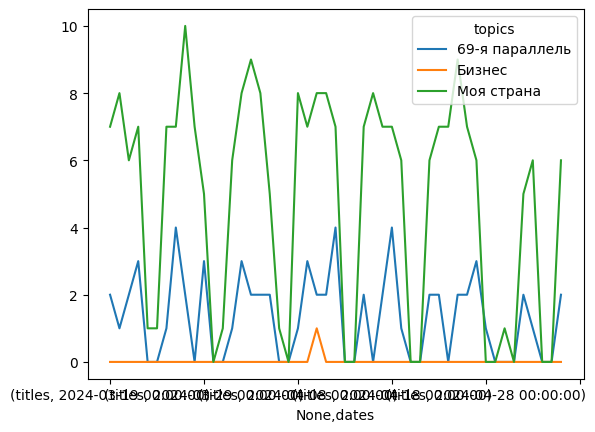

In [ ]:
df_time_series.loc[lab[lab.label == 2] ['topic'].values.tolist(), :].T.plot()

In [20]:
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

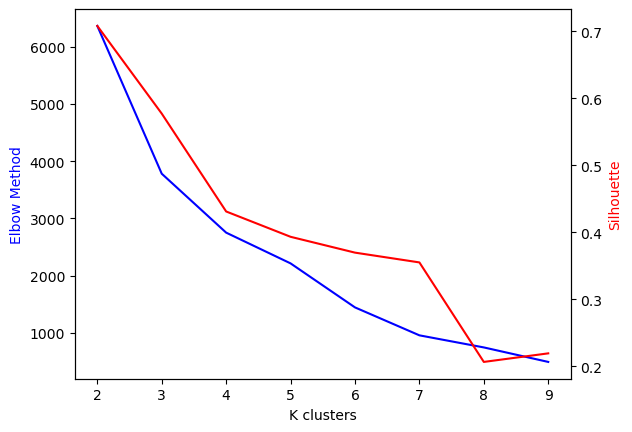

In [21]:
def optimal_clusters(df_, metric):
  distortions = []
  silhouette = []
  n_clusters = range(2, 10)
  for n in n_clusters:
    kmeanModel = TimeSeriesKMeans(n_clusters=n, metric=metric, n_jobs=6, max_iter=10, random_state=0)
    kmeanModel.fit(df_ )
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(df_, kmeanModel.labels_, metric=metric, random_state=0))
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(n_clusters, distortions, 'b-')
  ax2.plot(n_clusters, silhouette, 'r-')
  ax1.set_xlabel('K clusters')
  ax1.set_ylabel('Elbow Method', color='b')
  ax2.set_ylabel('Silhouette', color='r')
  plt.show()

optimal_clusters(df_time_series, 'dtw')